In [ ]:
def select_seed_nodes(G, k, M, p):
    S = set()
    V = set(G.nodes())  # Assuming G is a NetworkX graph or a similar graph representation
    ddv = {v: G.degree(v) for v in V}

    for i in range(k):
        u = max((v for v in V - S), key=lambda v: ddv[v])
        S.add(u)

        for v in G.neighbors(u):
            if v not in S:
                ddv[v] = G.degree(v) - 1 - (G.degree(u) - 1) * p
                10 - 1 - (4*0.2)
    return S

In [ ]:
import networkx as nx

In [ ]:
G = nx.erdos_renyi_graph(10000,0.5)

In [ ]:
import matplotlib.pyplot as plt
#nx.draw(G, with_labels=True)

In [ ]:
select_seed_nodes(G, 15,0, 0.5)

{65,
 173,
 968,
 1834,
 1996,
 3443,
 4732,
 5404,
 5497,
 5637,
 6585,
 6751,
 7573,
 8780,
 9299}

In [ ]:
Gk = nx.karate_club_graph()

In [ ]:
s = select_seed_nodes(Gk, 10,0, 0.5)

In [ ]:
s

{0, 1, 2, 5, 6, 16, 24, 31, 32, 33}

In [ ]:
import numpy as np

def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """

    # Loop over the Monte-Carlo Simulations
    spread = []
    activated_nodes = []
    for i in range(mc):

        # Simulate propagation process
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:

                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(list(g.neighbors(node)))) < p
                new_ones += list(np.extract(success, list(g.neighbors(node))))

            new_active = list(set(new_ones) - set(A))

            # Add newly activated nodes to the set of activated nodes
            A += new_active

        spread.append(len(A))
        activated_nodes = A

    return A, (np.mean(spread))

In [ ]:
G = nx.erdos_renyi_graph(100,0.5)

In [ ]:
spread, mean_spread = IC(Gk, list(s), p=0.5)

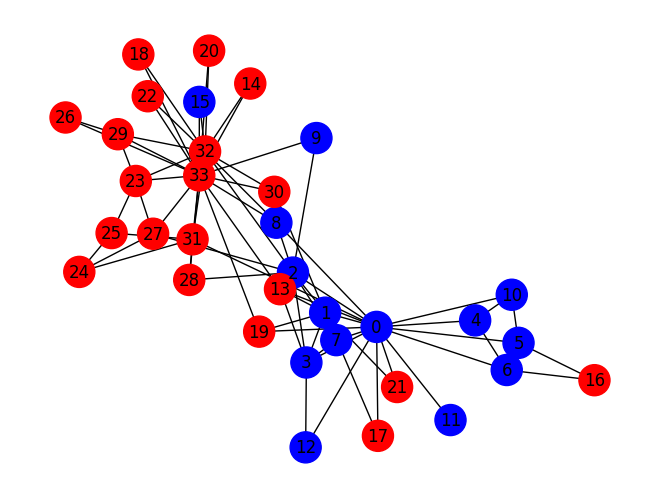

In [ ]:
# Create a list of colors for each node based on whether it's in the highlight set
node_colors = ['red' if node in spread else 'blue' for node in Gk.nodes()]

pos = nx.spring_layout(Gk)  # Layout the graph

nx.draw(Gk, pos, with_labels=True, node_color=node_colors, node_size=500)

In [ ]:
Gk.number_of_nodes()

34

In [ ]:
G = nx.erdos_renyi_graph(10000,0.2)
# pos = nx.spring_layout(G)  # Layout the graph

# nx.draw(G, pos, node_size=10)

In [ ]:
G.number_of_edges(), G.number_of_nodes()

(10001495, 10000)

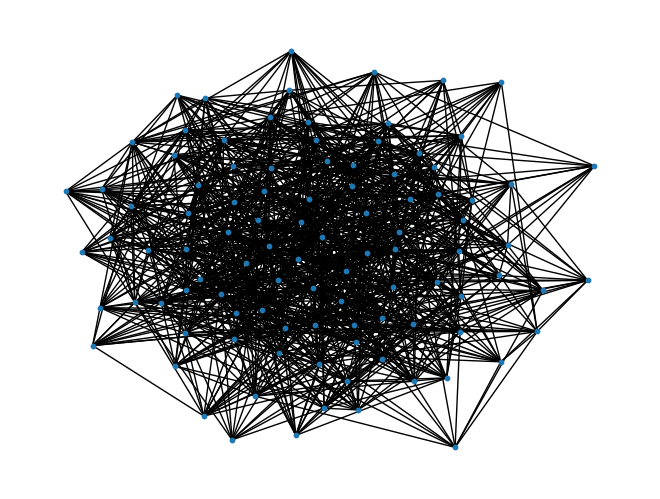

In [ ]:
nx.draw(G, pos, node_size=10)

In [ ]:
s = select_seed_nodes(G, 1000,0, 0.5)

In [ ]:
spread, mean_spread = IC(G, list(s), p=0.5, mc=100)

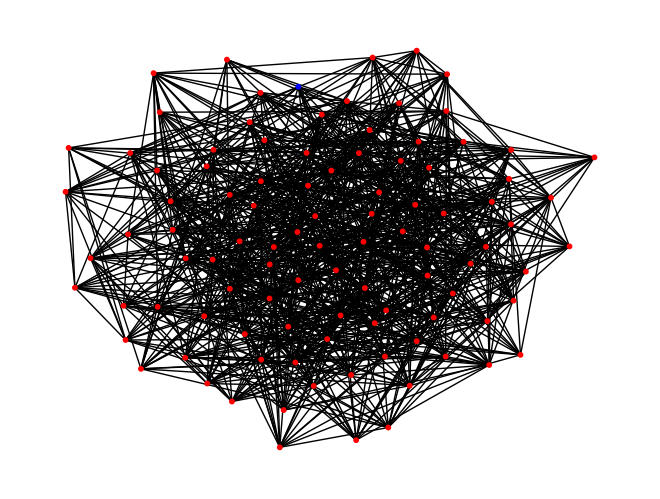

In [ ]:
# Create a list of colors for each node based on whether it's in the highlight set
node_colors = ['red' if node in spread else 'blue' for node in G.nodes()]

pos = nx.spring_layout(G)  # Layout the graph

nx.draw(G, pos, node_color=node_colors, node_size=10)

In [ ]:
mean_spread

998.75